<a href="https://colab.research.google.com/github/VidhyaP11/GOLD_PREDICTION/blob/main/GOLD_PRECDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GOLD PRICE PREDICTION USING PYTHON**(MACHINE LEARNING) 

### ***USING OPEN CV FOR REPRESENTING THE IMAGE OF TITLE***

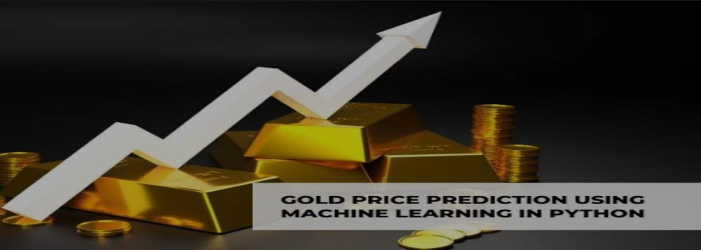

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
img=cv2.imread("/content/goldp.jpg")
new_img = cv2.resize(img, (701,250))
cv2_imshow(new_img)



*Gold is one commodity that is continously in demand.Gold price prediction is basic concept to predict the price of gold.So,here I am going to train a machine learning model for gold price prediction.*

### ***IMPORTING LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics


### ***GETTING THE DATASET FROM USER:***

In [ ]:
print("enter the path of the datasets to predict")
a=input()
GD=pd.read_csv(a)
print(GD.head())

enter the path of the datasets to predict
/content/archive (1).zip
       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


## ***DATA PROCESSING***

In [ ]:
# print last 5 rows of the dataframe
GD.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
GD.shape

(2290, 6)

So they 2290 rows and 6 column

In [ ]:
# getting some basic informations about the data
GD.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
GD.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

So there is no missing value

In [ ]:
GD.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## ***DATA ANALYSIS***

Correlation:
1.   positive correlation
2.   negative correlation



In [ ]:
correlation = GD.corr()

<ipython-input-80-371ad0c4a8a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = GD.corr()


<Axes: >

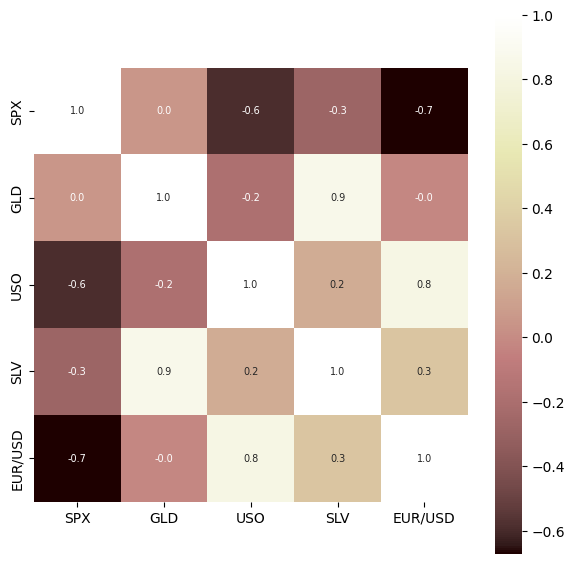

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':7}, cmap='pink')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


*Gold and silver column are positively correlated(see the value of the SLV and GLD has positive value,USO and EUR/USD are slightly negatively correlated ,SPX is sligthly positively correlated*

<ipython-input-83-cb749df934ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GD['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

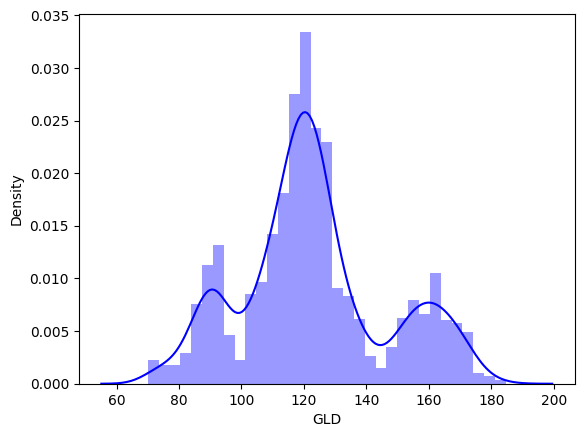

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(GD['GLD'],color='blue')

### ***SPLITTING THE FEATURES AND TARGET***

In [ ]:
#column drop axis=1
#row dop axis=0
X = GD.drop(['Date','GLD'],axis=1)
y= GD['GLD']

In [ ]:
#Features
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
#Target
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64



***SPLITTING INTO TRAINING DATA AND TEST DATA***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

***MODE BULDING***

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor1=XGBRegressor(learning_rate=0.5 ,max_depth=3,n_estimators=200)

*TO FIND THE BEST MODEL SO TRAINING IT:*

In [ ]:
# training the model
regressor.fit(X_train,y_train)
regressor1.fit(X_train,y_train)
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
test_data_prediction1 = regressor1.predict(X_test)

***PRINTING THE DATA PREDICTION BY RANDOMFORESTREGRESSOR:***

In [ ]:
print(test_data_prediction)

[168.5187997   81.67849996 116.07879981 127.57560079 120.6844013
 154.68739744 150.35279813 126.1947003  117.6006986  126.10750099
 116.61190127 172.05140104 141.72409871 167.896399   115.1974001
 117.44400024 137.92310332 170.19020074 159.78710276 157.51489888
 155.12220009 125.13040022 176.46269941 156.77060319 125.29710041
  93.90209961  77.4979     120.6773999  118.99069867 167.49969857
  88.16230074 125.29440043  90.99930065 117.65030037 121.17759915
 136.83430058 115.45100132 115.09740075 146.80940017 107.17960112
 103.82740219  87.10899775 126.42680066 117.82610022 153.25789906
 119.72230006 108.43109986 108.3593985   93.18480027 127.18529759
  74.77070055 113.76099946 121.19430005 111.24709882 118.90629894
 120.74699945 159.14280024 168.15030074 146.80379682  85.8135987
  94.38060015  86.70839891  90.46270038 118.92940077 126.39770071
 127.32359969 169.65260017 122.263599   117.21979914  98.3363005
 168.51400121 142.97299795 132.35940256 121.21700202 121.10309967
 119.68610057 

***PRINTING THE DATA PREDICTION BY XGBOOSTREGRESSOR:***

In [ ]:
print(test_data_prediction1)

[168.84769   81.04285  115.62361  127.752686 121.180504 156.37541
 150.30524  126.21955  118.41371  126.205734 115.99684  171.64209
 142.08769  165.1651   113.5009   118.36766  142.3224   169.23817
 154.88295  160.7377   154.75986  124.633385 179.31944  155.4392
 125.297905  97.00863   78.8846   120.95617  119.10798  168.29483
  87.09766  125.413475  92.980286 118.19581  121.571075 143.21681
 116.92344  115.08539  142.81636  108.19693  102.1485    86.88273
 126.17156  115.77796  150.76385  119.97356  110.60194  107.22752
  92.221695 127.40264   72.353    113.1545   119.37698  111.98129
 119.66296  120.6481   157.76776  170.81975  146.64928   86.22618
  94.409035  86.75265   89.44289  117.02612  126.879036 127.442894
 165.55309  121.74831  116.81094   98.6801   169.24922  142.27975
 136.04846  121.055664 122.9299   119.84651  114.62808  118.40164
 107.79739  128.40062  116.103615 105.57617  115.209785 119.93981
  87.84858   87.70591  142.14526  127.9946   115.234604 110.89915
 107.06077

### ***MODEL EVALUTION:***

***FINDIND THE ACCURANCY:***

In [ ]:
# R squared error randomforestregressor
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error  randomforestregressor:  ",round(error_score*100,3))
# R squared error XGboostregressor
error_score1 = metrics.r2_score(y_test, test_data_prediction1)
print("R squared error XGboostregressor : ",round(error_score1*100,3),)

R squared error  randomforestregressor:   98.936
R squared error XGboostregressor :  98.297


***Compare the Actual Values and Predicted Values in a Plot by Randomforestregressor***

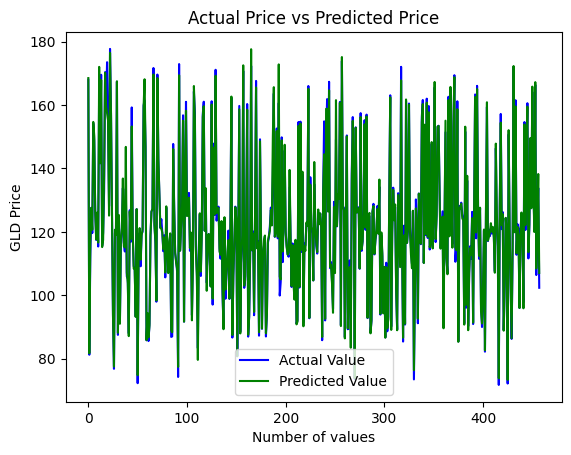

In [ ]:
y_test = list(y_test)
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

***Compare the Actual Values and Predicted Values in a Plot by XGBOOSTregressor***

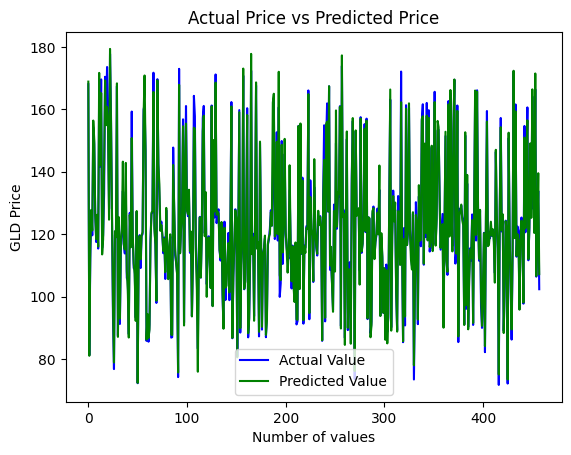

In [ ]:
y_test = list(y_test)
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction1, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

### **MODEL EVALUVATION:**

In [ ]:
if(error_score >= error_score1):
  {
    print("The best regressor for gold price prediction is Randomforestregressor with R squared error :",round(error_score*100,2))
  }
else:
  {
    print("The best regressor for gold price prediction is XGBOOSTregressor with R squared error :",error_score1*100)
  }

The best regressor for gold price prediction is Randomforestregressor with R squared error : 98.94


### ***CONCLUSION:***

The model created for gold price prediction by comparing Randomforestregressor and XGBoostregressor algorithm.Thus best regressor for gold price prediction is Randomforestregressor with R squared error : 98.94%.